#### Import Libraries

In [127]:
%load_ext autoreload
%autoreload 2

import six
import pandas as pd
import numpy as np
from skeleton.utils import pystr


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Load datasets 

In [136]:
boston = pd.read_csv("../datasets/boston_housing.csv")
pystr(df)

Pandas DataFrame 674 obs. of 82 variables
$ Id          : int64    1, 3, 7, 9, 14, 15, 17, 20, 23, 27, 29, 33, 34, 37, 38, 39, 40, 41, 44, 45, 48, ...
$ MSSubClass  : int64    60, 60, 20, 50, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 90, 20, 20, 20, ...
$ MSZoning    : str      "RL", "RL", "RL", "RM", "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RL", "R...
$ LotFrontage : float64  65.0, 68.0, 75.0, 51.0, 91.0, nan, nan, 70.0, 75.0, 60.0, 47.0, 85.0, 70.0, 112....
$ LotArea     : int64    8450, 11250, 10084, 6120, 10652, 10920, 11241, 7560, 9742, 7200, 16321, 11049, 1...
$ Street      : str      "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", ...
$ Alley       : str      "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "na...
$ LotShape    : str      "Reg", "IR1", "Reg", "Reg", "IR1", "IR1", "IR1", "Reg", "Reg", "Reg", "IR1", "Re...
$ LandContour : str      "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl"

#### Plots

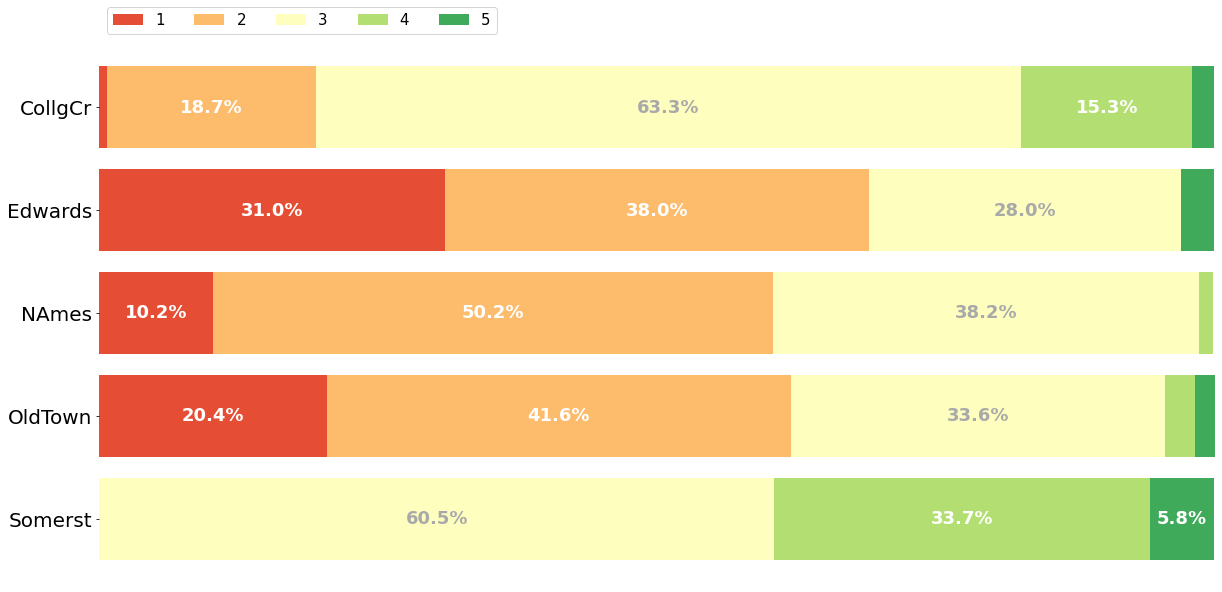

In [24]:
from skeleton.plots.barplots import plot_percentage_per_subcategory

primary='Neighborhood'
secondary='stars'
 
popular_neighborhoods = boston.groupby('Neighborhood').Id.count() #.index
popular_neighborhoods = popular_neighborhoods[popular_neighborhoods > 80].index

df = (boston
    .loc[lambda df: df.Neighborhood.isin(popular_neighborhoods)]
    .assign(stars = lambda df: df.OverallQual.replace({2:1,3:1,4:1,5:2,6:3,7:3,8:4,9:5,10:5}))
    
) 
    
plot_percentage_per_subcategory(df,primary,secondary);